# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

## Set up environment

The following lines ensure that `numpy` and `pandas` are installed in the notebook environment.  Depending on your system, this may not be necessary and may be removed.

In [155]:
!pip install numpy
!pip install pandas

Import the core data science libraries:

In [156]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [157]:
df = pd.read_csv('2023_picks.csv')

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

In [158]:
df.sample(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Misc,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Receiving,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
136,5,136,JAX,Yasir Abdullah,LB,23,2023,0,0,0,...,0,0,0,0,0,1,NaN,NaN,Louisville,College Stats
37,2,37,SEA,Derick Hall,DE,22,2023,0,0,0,...,0,0,0,0,0,18,NaN,NaN,Auburn,College Stats
254,7,254,NYG,Gervarrius Owens,DB,23,2023,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,Houston,College Stats
53,2,53,CHI,Gervon Dexter,DL,21,2023,0,0,0,...,0,0,0,0,0,13,NaN,2.5,Florida,College Stats
81,3,81,TEN,Tyjae Spears,RB,22,2023,0,0,0,...,453,2,52,385,1,NaN,NaN,NaN,Tulane,College Stats


This dataset contains all the draft selections from the 2023 NFL draft. However, it seems as though the formatting has not been maintained properly.

In [159]:
df.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Misc,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Receiving,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,Rnd,Pick,Tm,Player,Pos,Age,To,AP1,PB,St,...,Yds,TD,Rec,Yds,TD,Solo,Int,Sk,College/Univ,NaN
1,1,1,CAR,Bryce Young,QB,22,2023,0,0,0,...,253,0,0,0,0,NaN,NaN,NaN,Alabama,College Stats
2,1,2,HOU,C.J. Stroud,QB,21,2023,0,1,0,...,167,3,1,0,0,NaN,NaN,NaN,Ohio St.,College Stats
3,1,3,HOU,Will Anderson,LB,22,2023,0,1,0,...,0,0,0,0,0,29,NaN,7,Alabama,College Stats
4,1,4,IND,Anthony Richardson,QB,21,2023,0,0,0,...,136,4,0,0,0,NaN,NaN,NaN,Florida,College Stats


There were labels that identified offensive and defensive stats. These labels were percieved as the column labels so we have to fix this.

In [160]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Misc', 'Unnamed: 8', 'Unnamed: 9',
       'Approx Val', 'Unnamed: 11', 'Unnamed: 12', 'Passing', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Rushing', 'Unnamed: 19',
       'Unnamed: 20', 'Receiving', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28'],
      dtype='object')

My dataset needs heavy data munging to get it to a useable state. After data munging, I will check the columns again.

## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

The first order of business is to fix my column titles so that the data is easier to work with. I stored all the values of the first row, which contained the true column titles, in a variable called column_names. I edited my df to only have rows past this point (the actual data), and then renamed the titles with the values in column_names. As you can see, our dataset looks much better. However, I will now note that columns 13 through 17 are for Passing stats, 18 through 20 are Rushing Stats, 21 through 23 are Recieving stats, and 24 through 26 are defensive stats.

In [161]:
column_names = df.iloc[0]
df = df[1:]
df.columns = column_names

In [162]:
df.head(5)

,Rnd,Pick,Tm,Player,Pos,Age,To,AP1,PB,St,...,Yds,TD,Rec,Yds,TD,Solo,Int,Sk,College/Univ,NaN
1,1,1,CAR,Bryce Young,QB,22,2023,0,0,0,...,253,0,0,0,0,NaN,NaN,NaN,Alabama,College Stats
2,1,2,HOU,C.J. Stroud,QB,21,2023,0,1,0,...,167,3,1,0,0,NaN,NaN,NaN,Ohio St.,College Stats
3,1,3,HOU,Will Anderson,LB,22,2023,0,1,0,...,0,0,0,0,0,29,NaN,7,Alabama,College Stats
4,1,4,IND,Anthony Richardson,QB,21,2023,0,0,0,...,136,4,0,0,0,NaN,NaN,NaN,Florida,College Stats
5,1,5,SEA,Devon Witherspoon,DB,22,2023,0,1,0,...,0,0,0,0,0,56,1,3,Illinois,College Stats


These are the actual columns for my dataset. However, not all are necessary and some are redundant.

In [163]:
df.columns

Index([         'Rnd',         'Pick',           'Tm',       'Player',
                'Pos',          'Age',           'To',          'AP1',
                 'PB',           'St',          'wAV',         'DrAV',
                  'G',          'Cmp',          'Att',          'Yds',
                 'TD',          'Int',          'Att',          'Yds',
                 'TD',          'Rec',          'Yds',           'TD',
               'Solo',          'Int',           'Sk', 'College/Univ',
                  nan],
      dtype='object', name=0)

My rename_columns function will allow me to differentiate between the redundant column titles as they are still useful for different anaylsis.

In [164]:
def rename_columns(df, target_column):
    cols = []
    count = 1
    for column in df.columns:
        if column == target_column:
            cols.append(f'{target_column}_{count}')
            count += 1
            continue
        cols.append(column)
    df.columns = cols
    return cols

In [165]:
rename_columns(df, 'Att')
rename_columns(df, 'Yds')
rename_columns(df, 'TD')
rename_columns(df, 'Int')

['Rnd',
 'Pick',
 'Tm',
 'Player',
 'Pos',
 'Age',
 'To',
 'AP1',
 'PB',
 'St',
 'wAV',
 'DrAV',
 'G',
 'Cmp',
 'Att_1',
 'Yds_1',
 'TD_1',
 'Int_1',
 'Att_2',
 'Yds_2',
 'TD_2',
 'Rec',
 'Yds_3',
 'TD_3',
 'Solo',
 'Int_2',
 'Sk',
 'College/Univ',
 nan]

Now, I will make my data more concise and focus solely on the most relevant columns. For instance, some of the columns are irrelevant to rookies as they have only played one year in the NFL and need more time for those stats to be useful. I will get rid of those columns.

In [166]:
bad_columns = ['To', 'AP1', 'PB', 'St', 'wAV', 'DrAV']
df.drop(columns=bad_columns, inplace=True)
df.columns

Index([         'Rnd',         'Pick',           'Tm',       'Player',
                'Pos',          'Age',            'G',          'Cmp',
              'Att_1',        'Yds_1',         'TD_1',        'Int_1',
              'Att_2',        'Yds_2',         'TD_2',          'Rec',
              'Yds_3',         'TD_3',         'Solo',        'Int_2',
                 'Sk', 'College/Univ',            nan],
      dtype='object')

I also got rid of the nan columns that linked to the players college stats.

In [167]:
df.drop(df.columns[-1], axis=1, inplace=True)
df.columns

Index(['Rnd', 'Pick', 'Tm', 'Player', 'Pos', 'Age', 'G', 'Cmp', 'Att_1',
       'Yds_1', 'TD_1', 'Int_1', 'Att_2', 'Yds_2', 'TD_2', 'Rec', 'Yds_3',
       'TD_3', 'Solo', 'Int_2', 'Sk', 'College/Univ'],
      dtype='object')

This is the munged dataset.

In [168]:
df.head()

,Rnd,Pick,Tm,Player,Pos,Age,G,Cmp,Att_1,Yds_1,...,Att_2,Yds_2,TD_2,Rec,Yds_3,TD_3,Solo,Int_2,Sk,College/Univ
1,1,1,CAR,Bryce Young,QB,22,16,315,527,2877,...,39,253,0,0,0,0,NaN,NaN,NaN,Alabama
2,1,2,HOU,C.J. Stroud,QB,21,15,319,499,4108,...,39,167,3,1,0,0,NaN,NaN,NaN,Ohio St.
3,1,3,HOU,Will Anderson,LB,22,15,0,0,0,...,0,0,0,0,0,0,29,NaN,7,Alabama
4,1,4,IND,Anthony Richardson,QB,21,4,50,84,577,...,25,136,4,0,0,0,NaN,NaN,NaN,Florida
5,1,5,SEA,Devon Witherspoon,DB,22,14,0,0,0,...,0,0,0,0,0,0,56,1,3,Illinois


In [169]:
df.dtypes

Rnd             object
Pick            object
Tm              object
Player          object
Pos             object
Age             object
G               object
Cmp             object
Att_1           object
Yds_1           object
TD_1            object
Int_1           object
Att_2           object
Yds_2           object
TD_2            object
Rec             object
Yds_3           object
TD_3            object
Solo            object
Int_2           object
Sk              object
College/Univ    object
dtype: object

I have to also change the data values into appropriate data types so I can do analysis.

In [170]:
num_columns = ['Rnd', 'Pick', 'Age', 'G', 'Cmp', 'Att_1', 'Yds_1', 'TD_1', 'Int_1',
                      'Att_2', 'Yds_2', 'TD_2', 'Rec', 'Yds_3', 'TD_3', 'Solo', 'Int_2', 'Sk']
df[columns_to_convert] = df[num_columns].apply(pd.to_numeric, errors='coerce')

str_columns = ['Tm', 'Player', 'Pos', 'College/Univ']
df[columns_to_string] = df[str_columns].astype(str)

In [171]:
df.dtypes

Rnd               int64
Pick              int64
Tm               object
Player           object
Pos              object
Age             float64
G               float64
Cmp             float64
Att_1           float64
Yds_1           float64
TD_1            float64
Int_1           float64
Att_2           float64
Yds_2           float64
TD_2            float64
Rec             float64
Yds_3           float64
TD_3            float64
Solo            float64
Int_2           float64
Sk              float64
College/Univ     object
dtype: object

In [172]:
df.head()

,Rnd,Pick,Tm,Player,Pos,Age,G,Cmp,Att_1,Yds_1,...,Att_2,Yds_2,TD_2,Rec,Yds_3,TD_3,Solo,Int_2,Sk,College/Univ
1,1,1,CAR,Bryce Young,QB,22.0,16.0,315.0,527.0,2877.0,...,39.0,253.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Alabama
2,1,2,HOU,C.J. Stroud,QB,21.0,15.0,319.0,499.0,4108.0,...,39.0,167.0,3.0,1.0,0.0,0.0,NaN,NaN,NaN,Ohio St.
3,1,3,HOU,Will Anderson,LB,22.0,15.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,29.0,NaN,7.0,Alabama
4,1,4,IND,Anthony Richardson,QB,21.0,4.0,50.0,84.0,577.0,...,25.0,136.0,4.0,0.0,0.0,0.0,NaN,NaN,NaN,Florida
5,1,5,SEA,Devon Witherspoon,DB,22.0,14.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,56.0,1.0,3.0,Illinois


## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

Which college had the most recivers

### Age

In [103]:
avg_age = df['Age'].mean()
print(avg_age)

22.670542635658915


In [113]:
min_age = df['Age'].min()
max_age = df['Age'].max()
print(min_age)
print(max_age)

20.0
25.0


The average age for an NFL Draftee is about 22.67 years old. This makes sense as most people tend to play a few years in college before declaring for the NFL draft. The youngest draftee was 20, and the oldest was 25.

### Position

In [111]:
position_breakdown = df['Pos'].value_counts()
print(position_breakdown)

OL     39
DB     34
WR     33
DL     20
LB     18
RB     18
CB     16
TE     15
DE     15
QB     14
DT     12
S       8
OLB     6
K       3
P       3
C       2
T       1
NT      1
G       1
Name: Pos, dtype: int64


In [117]:
avg_rd_pos = df.groupby('Pos')['Rnd'].mean().sort_values()
print(avg_rd_pos)

Pos
NT     2.000000
T      2.000000
OLB    3.166667
DL     3.350000
C      3.500000
TE     3.600000
QB     3.785714
DE     3.800000
G      4.000000
LB     4.055556
OL     4.230769
WR     4.242424
K      4.333333
DB     4.352941
RB     4.388889
CB     5.000000
DT     5.083333
S      5.625000
P      6.333333
Name: Rnd, dtype: float64


The most sought after positions were offensive linemen, and the least sought after were punters and kickers. This aligns with current trends in the NFL as there seems to be a shortage of servicable linemen, as reflected by rising contract values for successful offensive linemen. However, it seems that defensive linemen are drafted higher, on average.

In [120]:
wr_data = df[df['Pos'] == 'WR']

avg_rec = wr_data['Rec'].mean()
avg_yds = wr_data['Yds_3'].mean()
avg_td = wr_data['TD_3'].mean()

print("Average Receptions for WR:", avg_rec)
print("Average Yards for WR:", avg_yds)
print("Average Touchdowns for WR:", avg_td)

Average Receptions for WR: 33.03225806451613
Average Yards for WR: 404.5483870967742
Average Touchdowns for WR: 2.5161290322580645


As the NFL becomes more offensively minded, more and more recievers are drafted every year with higher draft capital. This is how the average rookie receiver performs.

In [123]:
rec_yds = wr_data.loc[wr_data['Yds_3'].idxmax()]['Player']
max_yds = wr_data['Yds_3'].max()

rec_td = wr_data.loc[wr_data['TD_3'].idxmax()]['Player']
max_td = wr_data['TD_3'].max()

print("Receiver with the most yards:", rec_yds, "with", max_yds, "yards")
print("Receiver with the most touchdowns:", rec_td, "with", max_td, "touchdowns")

Receiver with the most yards: Puka Nacua with 1486.0 yards
Receiver with the most touchdowns: Jordan Addison with 10.0 touchdowns


These rookie receivers seem to be a cut above the rest.

### College

In [118]:
college_breakdown = df['College/Univ'].value_counts()
print(college_breakdown)

Alabama             10
Georgia             10
Michigan             9
TCU                  8
Florida              6
                    ..
North Dakota St.     1
William & Mary       1
South Alabama        1
California           1
Toledo               1
Name: College/Univ, Length: 95, dtype: int64


The college programs that had the most draftees in 2023 were Alabama and Georgia.

In [173]:
college_receiver_count = wr_data.groupby('College/Univ').size()
most_receivers_college = college_receiver_count.idxmax()
num_receivers = college_receiver_count.max()

print("College with the most receivers:", most_receivers_college)
print("Number of receivers drafted from this college:", num_receivers)

College with the most receivers: Cincinnati
Number of receivers drafted from this college: 2


The college with the most receivers drafted was Cincinnati University!

## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

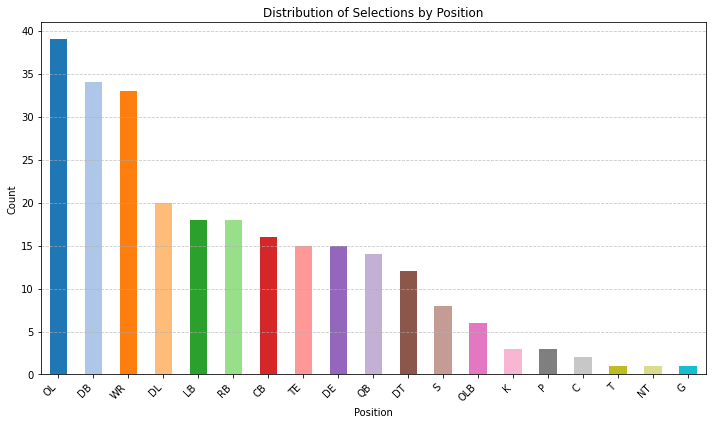

In [174]:
colors = plt.get_cmap('tab20')(range(len(avg_rd_pos)))
plt.figure(figsize=(10, 6))
position_breakdown.plot(kind='bar', color=colors)
plt.title('Distribution of Selections by Position')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This box plot shows us the distribution of positions selected within the 2023 NFL draft.

<Figure size 1440x1152 with 0 Axes>

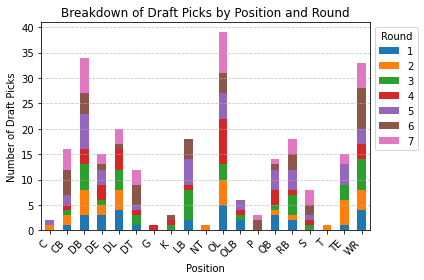

In [175]:
draft_picks_cross = pd.crosstab(df['Pos'], df['Rnd'])

plt.figure(figsize=(20, 16))
draft_picks_cross.plot(kind='bar', stacked=True)
plt.title('Breakdown of Draft Picks by Position and Round')
plt.xlabel('Position')
plt.ylabel('Number of Draft Picks')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Round', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This stacked bar plot gives further insight to the distribution of the round selected within each position. 

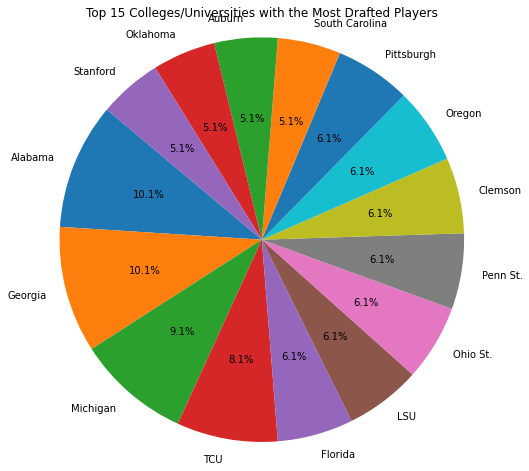

In [176]:
top_20_colleges = college_breakdown.head(15)

plt.figure(figsize=(8, 8))
top_20_colleges.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top 15 Colleges/Universities with the Most Drafted Players')
plt.ylabel('')
plt.axis('equal')
plt.show()

This pie chart demonstrates the distribution of college programs represented within the player selections. Only the top 15 are shown for visiblity purposes.

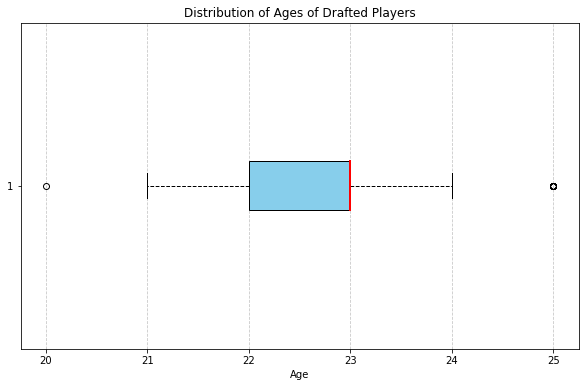

In [177]:
filtered_df = df.dropna(subset=['Age'])

# Create a box plot for the 'Age' column
plt.figure(figsize=(10, 6))
plt.boxplot(filtered_df['Age'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'),
            whiskerprops=dict(color='black', linestyle='--'), medianprops=dict(color='red', linewidth=2))
plt.title('Distribution of Ages of Drafted Players')
plt.xlabel('Age')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

This box plot shows the distribution of the ages of the rookies selected within the NFL draft. The two outliers are left as dots, and the mean is shown by the red line.

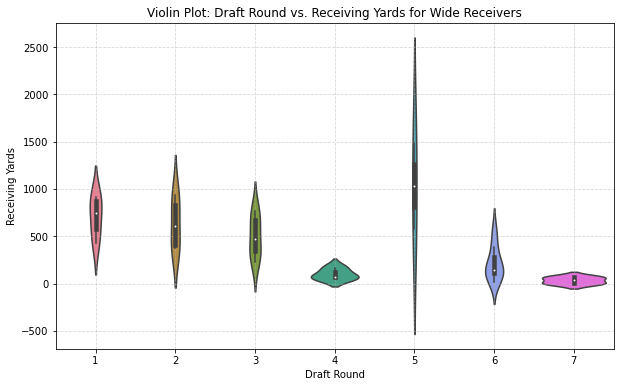

In [179]:
colors = sns.color_palette("husl", len(wr_data['Rnd'].unique()))

plt.figure(figsize=(10, 6))
sns.violinplot(x='Rnd', y='Yds_3', data=wr_data, palette=colors)
plt.title('Violin Plot: Draft Round vs. Receiving Yards for Wide Receivers')
plt.xlabel('Draft Round')
plt.ylabel('Receiving Yards')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

For the final graph, I used Seaborn to create a violin plot to show how various recievers did their rookie season depending on the round they were drafted in. The 5th round is misconstrued by the performance of Puka Nakua, but the overall trend seems to confirm the idea that drafting recievers higher leads to better production.